In [2]:
import os
from tqdm import tqdm
import torch
import numpy as np

In [3]:
root = '/data5/drone_machinelearning/amir/pix3d'

# Split Data

In [2]:
data='img'
og_path = root + '/' + data
train_path = og_path + '_split/train'
test_path = og_path + '_split/test'
classes = os.listdir(og_path)

In [15]:
for c in tqdm(classes):
    objs = sorted(os.listdir(og_path +'/' + c))
    for i,obj in enumerate(objs):
        if obj.split('.')[1] != 'png':
            os.remove(og_path+'/'+c+'/'+obj)

100%|██████████| 9/9 [00:03<00:00,  2.59it/s]


In [16]:
for c in tqdm(classes):
    objs = sorted(os.listdir(og_path +'/' + c))
    n = len(objs)
    if not os.path.exists(train_path+'/'+c):
        os.makedirs(train_path+'/'+c)
    if not os.path.exists(test_path+'/'+c):
        os.makedirs(test_path+'/'+c)
    
    for i,obj in enumerate(objs):
        if obj.split('.')[1] == 'png':
            if i<0.8*n:
                img_src = og_path+'/'+c+'/'+obj
                img_dst = train_path+'/'+c+'/'+obj
                os.symlink(img_src, img_dst)
            else:
                img_src = og_path+'/'+c+'/'+obj
                img_dst = test_path+'/'+c+'/'+obj
                os.symlink(img_src, img_dst)

100%|██████████| 9/9 [00:00<00:00, 63.18it/s]


# Test Size

In [4]:
render_path = root + '/render_split/train'
foreground_path = root + '/foreground_split/train'
background_path = root + '/background_split/train'
img_path = root + '/img_split/train'

for c in os.listdir(render_path):
    l1 = len(os.listdir(render_path + '/' + c))
    l2 = len(os.listdir(foreground_path + '/' + c))
    l3 = len(os.listdir(img_path + '/' + c))
    l4 = len(os.listdir(background_path + '/' + c))
    print(c,l1,l2,l3,l4,l1==l2==l3==l4)

('table', 1496, 1496, 1496, 1496, True)
('chair', 3072, 3072, 3072, 3072, True)
('wardrobe', 195, 195, 195, 195, True)
('misc', 55, 55, 55, 55, True)
('bed', 795, 795, 795, 795, True)
('bookcase', 289, 289, 289, 289, True)
('tool', 38, 38, 38, 38, True)
('desk', 560, 560, 560, 560, True)
('sofa', 1558, 1558, 1558, 1558, True)


In [5]:
render_path = root + '/render_split/test'
foreground_path = root + '/foreground_split/test'
background_path = root + '/background_split/test'
img_path = root + '/img_split/test'

for c in os.listdir(render_path):
    l1 = len(os.listdir(render_path + '/' + c))
    l2 = len(os.listdir(foreground_path + '/' + c))
    l3 = len(os.listdir(img_path + '/' + c))
    l4 = len(os.listdir(background_path + '/' + c))
    print(c,l1,l2,l3,l4,l1==l2==l3==l4)

('table', 374, 374, 374, 374, True)
('chair', 767, 767, 767, 767, True)
('wardrobe', 48, 48, 48, 48, True)
('misc', 13, 13, 13, 13, True)
('bed', 198, 198, 198, 198, True)
('bookcase', 72, 72, 72, 72, True)
('tool', 9, 9, 9, 9, True)
('desk', 140, 140, 140, 140, True)
('sofa', 389, 389, 389, 389, True)


In [ ]:
import json
annotations = json.load(open('pix3d.json'))

In [5]:
import torchvision

In [2]:
root = '/data5/drone_machinelearning/amir/pix3d'
og_path = root + '/render'
train_path = og_path + '_split/train'
train_target_path = root +'/foreground_split/train'

In [3]:
test_path = og_path + '_split/test'
test_target_path = root +'/foreground_split/test'

In [7]:
train_dataset, test_dataset = {}, {}
train_dataset['input'], train_dataset['target'], test_dataset['input'], test_dataset['target'] = [], [], [], []
train_dataset['input'] = torchvision.datasets.ImageFolder(train_path)
train_dataset['target'] = torchvision.datasets.ImageFolder(train_target_path)

In [4]:
import PIL
img = PIL.Image.open(og_path+'/'+classes[0]+'/'+os.listdir(og_path+'/'+classes[0])[0])

AttributeError: 'module' object has no attribute 'Image'

In [76]:
import torch
import torch.nn.functional as F
from Arch import *

In [77]:
NLayerDiscriminator(3)

NLayerDiscriminator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(0.2, inplace)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (4): LeakyReLU(0.2, inplace)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (7): LeakyReLU(0.2, inplace)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (10): LeakyReLU(0.2, inplace)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  )
)

In [78]:
PixelDiscriminator(input_nc=3)

PixelDiscriminator(
  (net): Sequential(
    (0): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): LeakyReLU(0.2, inplace)
    (2): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (4): LeakyReLU(0.2, inplace)
    (5): Conv2d(128, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
)

In [70]:
temp = Variable(torch.Tensor(2,1,256,256).fill_(0.1).cuda(),requires_grad=False)

In [71]:
t1 = N_D(temp)
t2 = P_D(temp)

In [72]:
patch = t1.data.shape

In [73]:
A=torch.rand(*patch)

In [75]:
A=Variable(A)

RuntimeError: Variable data has to be a tensor, but got Variable

In [4]:
from torchvision import datasets, models, transforms

input_transform = {
        'train': transforms.Compose([
            transforms.RandomResizedCrop(224,scale=(0.6,1.0)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'test': transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    }
target_transform = {
        'train': transforms.Compose([
            transforms.RandomResizedCrop(224,scale=(0.6,1.0)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'test': transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    }

In [5]:
from DRLoader import DRLoader
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable


temp = DRLoader(train_path, train_target_path, in_transform=input_transform['train'] \
                             ,target_transform=target_transform['train'])
temp2 = DRLoader(test_path, test_target_path, in_transform=input_transform['test'] \
                             ,target_transform=target_transform['test'])
data= DataLoader(temp,32, shuffle=True)


100%|██████████| 9/9 [00:00<00:00, 477.98it/s]


In [8]:
temp.ID.shape

(8058,)

In [7]:
from tqdm import tqdm
for i,(x,y,z) in enumerate(tqdm(data)):
    if int(x.shape[1])!=4:
        print(z)
        print('x',x)
        break
    if y.shape[1]!=3:
        print(z)
        print('y',y)
        break

 21%|██        | 53/252 [04:47<17:58,  5.42s/it]

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 3 and 4 in dimension 1 at /pytorch/torch/lib/TH/generic/THTensorMath.c:2897

In [32]:
z


 1029
 1030
 1031
 1032
 1033
 1034
 1035
 1036
 1037
 1038
 1039
 1040
 1041
 1042
 1043
 1044
 1045
 1046
 1047
 1048
 1049
 1050
 1051
 1052
 1053
 1054
 1055
 1056
 1057
 1058
 1059
 1060
 1061
 1062
 1063
 1064
 1065
 1066
 1067
 1068
 1069
 1070
 1071
 1072
 1073
 1074
 1075
 1076
 1077
 1078
 1079
 1080
 1081
 1082
 1083
 1084
 1085
 1086
 1087
 1088
 1089
 1090
 1091
 1092
[torch.LongTensor of size 64]

In [28]:
print(x.shape[1])==4

True


In [83]:
import numpy as np
img = np.transpose(img[0].numpy(),[1,2,0])

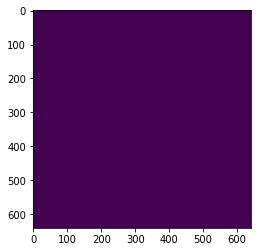

In [89]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:,3])
plt.show()

In [9]:
img = img[:,0:3]

In [38]:
classes = sorted(os.listdir(input_dir))
im_path, target_path, label = [], [], []
for index,c in enumerate(tqdm(sorted(os.listdir(input_dir)))):
    for obj in sorted(os.listdir(input_dir+'/'+c)):
        ann, ext = os.path.splitext(obj)[0], os.path.splitext(obj)[1]
        if ext not in ['.jpeg','.png']:
            continue
        im_path.append(os.path.join(input_dir,c,obj))
        target_path.append(os.path.join(target_dir,c,obj))
        label.append(int(ann))
                
images, targets, labels = np.array(im_path), np.array(target_path), np.array(label)



100%|██████████| 9/9 [00:00<00:00, 96.40it/s]


In [40]:
len(images)

8058

In [46]:
class UNet(nn.Module):
    def __init__(self, input_nc, ngf=64, output_nc=3):
        super(UNet, self).__init__()
        self.conv1 = nn.Conv2d(3, ngf, 3, padding=1)
        self.conv2 = nn.Conv2d(ngf, ngf, 3, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(ngf)
        self.pool1 = nn.MaxPool2d(2,2)

        self.conv3 = nn.Conv2d(ngf, ngf*2, 3, padding=1)
        self.conv4 = nn.Conv2d(ngf*2, ngf*2, 3, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(ngf*2)
        self.pool2 = nn.MaxPool2d(2,2)

        self.conv5 = nn.Conv2d(ngf*2, ngf*4, 3, padding=1)
        self.conv6 = nn.Conv2d(ngf*4, ngf*4, 3, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(ngf*4)
        self.pool3 = nn.MaxPool2d(2,2)

        self.conv7 = nn.Conv2d(ngf*4, ngf*8, 3, padding=1)
        self.conv8 = nn.Conv2d(ngf*8, ngf*8, 3, padding=1)
        self.batchnorm4 = nn.BatchNorm2d(ngf*8)
        self.pool4 = nn.MaxPool2d(2,2)

        self.conv9 = nn.Conv2d(ngf*8, ngf*8, 3, padding=1)
        self.conv10 = nn.Conv2d(ngf*8, ngf*8, 3, padding=1)
        self.batchnorm5 = nn.BatchNorm2d(ngf*8)

        self.convtran1 = nn.ConvTranspose2d(ngf*8,ngf*8,2,stride=2)
        
        self.conv11 = nn.Conv2d(ngf*16,ngf*4,3, padding=1)
        self.conv12 = nn.Conv2d(ngf*4, ngf*4,3, padding=1)
        self.batchnorm6 = nn.BatchNorm2d(ngf*4)

        self.convtran2 = nn.ConvTranspose2d(ngf*4,ngf*4,2,stride=2)

        self.conv13 = nn.Conv2d(ngf*8,ngf*2,3, padding=1)
        self.conv14 = nn.Conv2d(ngf*2,ngf*2,3, padding=1)
        self.batchnorm7 = nn.BatchNorm2d(ngf*2)

        self.convtran3 = nn.ConvTranspose2d(ngf*2,ngf*2,2,stride=2)

        self.conv15 = nn.Conv2d(ngf*4,ngf,3, padding=1)
        self.conv16 = nn.Conv2d(ngf,ngf,3, padding=1)
        self.batchnorm8 = nn.BatchNorm2d(ngf)

        self.convtran4 = nn.ConvTranspose2d(ngf,ngf,2,stride=2)

        self.conv17 = nn.Conv2d(ngf*2,ngf,3, padding=1)
        self.conv18 = nn.Conv2d(ngf, ngf,3, padding=1)
        self.batchnorm9 = nn.BatchNorm2d(ngf)
              
        self.conv19 = nn.Conv2d(ngf,output_nc,1)
            
    def forward(self, x):
        c1 = torch.nn.functional.relu(self.batchnorm1(self.conv1(x)))
        c1 = torch.nn.functional.relu(self.batchnorm1(self.conv2(c1)))
        p1 = self.pool1(c1)
        print('c1',c1.shape)
        c2 = torch.nn.functional.relu(self.batchnorm2(self.conv3(p1)))
        c2 = torch.nn.functional.relu(self.batchnorm2(self.conv4(c2)))
        p2 = self.pool2(c2)
        print('c2',c2.shape)
        c3 = torch.nn.functional.relu(self.batchnorm3(self.conv5(p2)))
        c3 = torch.nn.functional.relu(self.batchnorm3(self.conv6(c3)))
        p3 = self.pool3(c3)
        print('c3',c3.shape)
        c4 = torch.nn.functional.relu(self.batchnorm4(self.conv7(p3)))
        c4 = torch.nn.functional.relu(self.batchnorm4(self.conv8(c4)))
        print('c4',c4.shape)
        p4 = self.pool4(c4)

        c5 = torch.nn.functional.relu(self.batchnorm5(self.conv9(p4)))
        c5 = torch.nn.functional.relu(self.batchnorm5(self.conv10(c5)))
        print('c5',c5.shape)
        u6 = self.convtran1(c5)
        u6 = torch.cat((u6,c4),dim=1)
        print('u6',u6.shape)
        c6 = torch.nn.functional.relu(self.batchnorm6(self.conv11(u6)))
        c6 = torch.nn.functional.relu(self.batchnorm6(self.conv12(c6)))
        print('c6',c6.shape)
        u7 = self.convtran2(c6)
        u7 = torch.cat((u7,c3),dim=1)
        print('u7',u7.shape)
        c7 = torch.nn.functional.relu(self.batchnorm7(self.conv13(u7)))
        c7 = torch.nn.functional.relu(self.batchnorm7(self.conv14(c7)))
        print('c7',c7.shape)
        u8 = self.convtran3(c7)
        u8 = torch.cat((u8,c2),dim=1)
        print('u8',u8.shape)
        c8 = torch.nn.functional.relu(self.batchnorm8(self.conv15(u8)))
        c8 = torch.nn.functional.relu(self.batchnorm8(self.conv16(c8)))
        print('c8',c8.shape)
        u9 = self.convtran4(c8)
        u9 = torch.cat((u9,c1),dim=1)
        print('u9',u9.shape)
        c9 = torch.nn.functional.relu(self.batchnorm9(self.conv17(u9)))
        c9 = torch.nn.functional.relu(self.batchnorm9(self.conv18(c9)))
        print('c9',c9.shape)
        out = torch.nn.functional.sigmoid(self.conv19(c9))
        
        return out
unet = UNet(3)
unet.cuda()

UNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
  (pool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (conv7): Conv2d(256, 512, kernel_size=(3, 

In [47]:
out = unet(Variable(torch.Tensor(img).cuda()))

('c1', torch.Size([2, 64, 224, 224]))
('c2', torch.Size([2, 128, 112, 112]))
('c3', torch.Size([2, 256, 56, 56]))
('c4', torch.Size([2, 512, 28, 28]))
('c5', torch.Size([2, 512, 14, 14]))
('u6', torch.Size([2, 1024, 28, 28]))
('c6', torch.Size([2, 256, 28, 28]))
('u7', torch.Size([2, 512, 56, 56]))
('c7', torch.Size([2, 128, 56, 56]))
('u8', torch.Size([2, 256, 112, 112]))
('c8', torch.Size([2, 64, 112, 112]))
('u9', torch.Size([2, 128, 224, 224]))
('c9', torch.Size([2, 64, 224, 224]))


In [20]:
512*1.5


768.0